In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the Data to Pandas DataFrame

whr_data = pd.read_csv('D://Data Trained//Internship//Projects//Project Details//2nd_Practice phase//data-1_.csv')
whr_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#Rows and Columns details of the data

whr_data.shape

(158, 12)

In [4]:
#checking if any missing values/null values in the data

whr_data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
#checking if any duplicate values in the data

whr_data.duplicated().sum()

0

In [6]:
#checking no. of unique values in all the attributes

whr_data.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [7]:
#Statistical details of the red wine data

whr_data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
#general information of the data set

whr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
#Separating non-influencing feature columns of the dataset

mdfy_data = whr_data.drop(columns=['Country','Region'], axis=1)
print(mdfy_data.dtypes)

Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


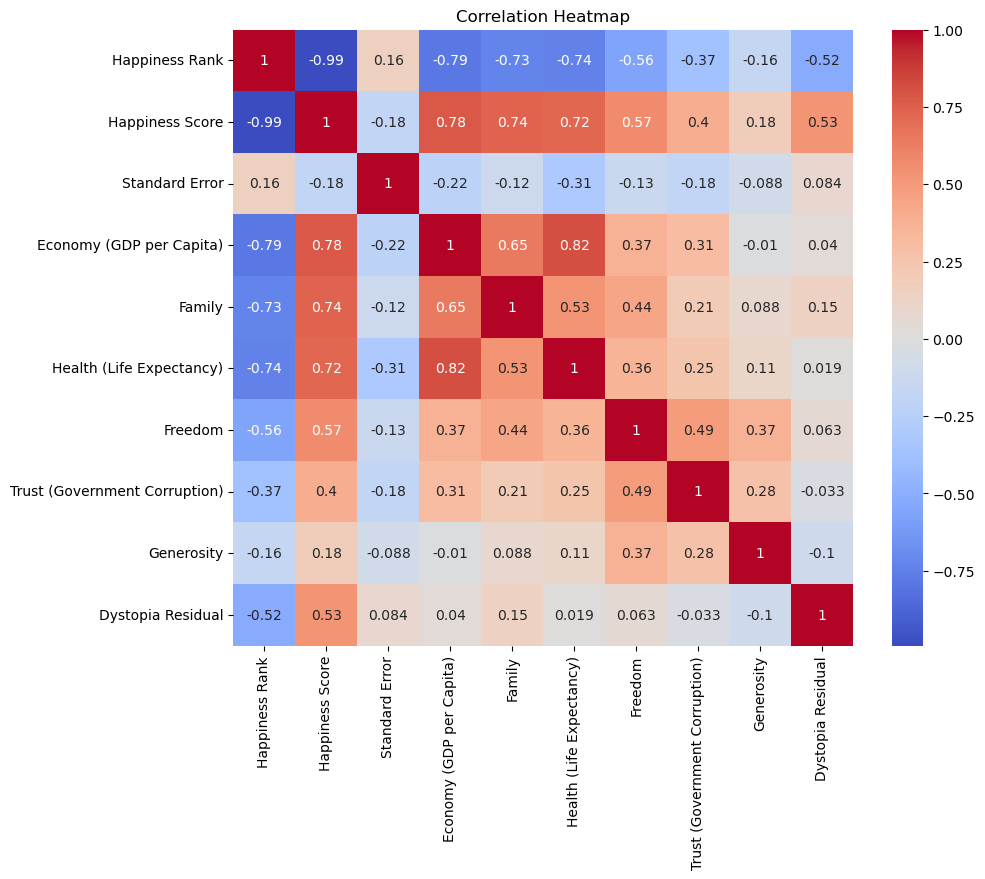

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64 

Freedom                          1.000000
Happiness Score                  0.568211
Trust (Government Corruption)    0.493524
Family                           0.441518
Generosity                       0.373916
Economy (GDP per Capita)         0.370300
Health (Life Expectancy)         0.360477
Dystopia Residual                0.062783
Standard Error                  -0.129773
Happiness Rank                  -0.556886
Name: Freedom, dtype: float64 

Dystopia Residual                1.000000
Happiness Score                  0.530474
Fami

In [10]:
#Visualizing by Heatmap to understand the correlation between all the effective columns of the dataset

corr_whr = mdfy_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_whr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print(corr_whr['Happiness Score'].sort_values(ascending=False), '\n')  #to print the correlation of particular column with other columns 

print(corr_whr['Freedom'].sort_values(ascending=False), '\n')
print(corr_whr['Dystopia Residual'].sort_values(ascending=False), '\n')
print(corr_whr['Trust (Government Corruption)'].sort_values(ascending=False), '\n')
print(corr_whr['Generosity'].sort_values(ascending=False), '\n')
print(corr_whr['Standard Error'].sort_values(ascending=False), '\n')

In [11]:
#according to the correlation, feature combination is done for low correlation feature columns of the data

mdfy_data['Geno_trust'] = mdfy_data['Generosity'] + mdfy_data['Trust (Government Corruption)']
mdfy_data['Freedom_trust'] = mdfy_data['Freedom'] + mdfy_data['Trust (Government Corruption)']
mdfy_data['Geno_freedom'] = mdfy_data['Generosity'] + mdfy_data['Freedom']

paired_data = mdfy_data.drop(columns=['Generosity', 'Trust (Government Corruption)', 'Freedom'])

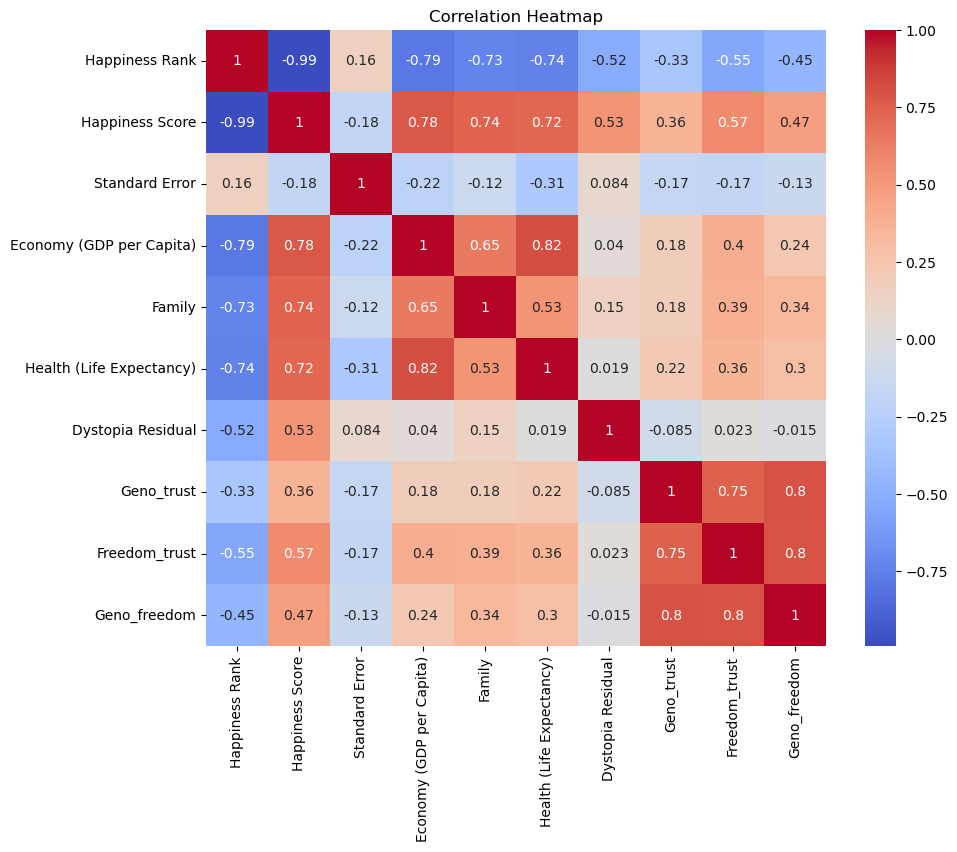

Happiness Score             1.000000
Economy (GDP per Capita)    0.780966
Family                      0.740605
Health (Life Expectancy)    0.724200
Freedom_trust               0.567533
Dystopia Residual           0.530474
Geno_freedom                0.471008
Geno_trust                  0.356545
Standard Error             -0.177254
Happiness Rank             -0.992105
Name: Happiness Score, dtype: float64 

Freedom_trust               1.000000
Geno_freedom                0.795881
Geno_trust                  0.750230
Happiness Score             0.567533
Economy (GDP per Capita)    0.395629
Family                      0.389039
Health (Life Expectancy)    0.358827
Dystopia Residual           0.023404
Standard Error             -0.174705
Happiness Rank             -0.548539
Name: Freedom_trust, dtype: float64 

Dystopia Residual           1.000000
Happiness Score             0.530474
Family                      0.148117
Standard Error              0.083981
Economy (GDP per Capita)    0.0400

In [12]:
#Visualizing by Heatmap to understand the correlation between all the effective columns of the dataset after FEATURE COMBINATION

mdfy_corr = paired_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=mdfy_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print(mdfy_corr['Happiness Score'].sort_values(ascending=False), '\n')  #to print the correlation of particular column with other columns 

print(mdfy_corr['Freedom_trust'].sort_values(ascending=False), '\n')
print(mdfy_corr['Dystopia Residual'].sort_values(ascending=False), '\n')
print(mdfy_corr['Geno_trust'].sort_values(ascending=False), '\n')
print(mdfy_corr['Geno_freedom'].sort_values(ascending=False), '\n')
print(mdfy_corr['Standard Error'].sort_values(ascending=False), '\n')

In [13]:
#Automatic outliers detaction and removal of outliers

iso_forest = IsolationForest(contamination=0.03) #removal of 3% of the outliers
y_pred =iso_forest.fit_predict(paired_data.select_dtypes(include=['float64', 'int64']))
outliers = y_pred == -1

mdfy_cleandata = paired_data[~outliers]

In [14]:
#Data Preprocessing to prepare for the machine learning model

x_para = mdfy_cleandata.drop(columns=['Happiness Score'])
y_para = mdfy_cleandata['Happiness Score']

In [15]:
x_para

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Dystopia Residual,Geno_trust,Freedom_trust,Geno_freedom
0,1,0.03411,1.39651,1.34951,0.94143,2.51738,0.71656,1.08535,0.96235
1,2,0.04884,1.30232,1.40223,0.94784,2.70201,0.57775,0.77022,1.06507
2,3,0.03328,1.32548,1.36058,0.87464,2.49204,0.82496,1.13295,0.99077
3,4,0.03880,1.45900,1.33095,0.88521,2.46531,0.71202,1.03476,1.01672
4,5,0.03553,1.32629,1.32261,0.90563,2.45176,0.78768,0.96254,1.09108
...,...,...,...,...,...,...,...,...,...
150,151,0.05141,0.46534,0.77115,0.15185,1.41723,0.38087,0.64788,0.67031
151,152,0.04324,0.25812,0.85188,0.27125,1.46494,0.34579,0.52325,0.61240
152,153,0.03084,0.31982,0.30285,0.30335,1.95210,0.46229,0.33133,0.59924
154,155,0.03656,0.28665,0.35386,0.31910,1.63328,0.26270,0.56460,0.66710


In [16]:
y_para

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
157    2.839
Name: Happiness Score, Length: 153, dtype: float64

In [17]:
#Splitting the preprocessed data into train and test data and target datas

x_para_train, x_para_test, y_para_train, y_para_test = train_test_split(x_para, y_para, test_size=0.2, random_state=2)

In [18]:
print(x_para.shape, x_para_train.shape, x_para_test.shape)

(153, 9) (122, 9) (31, 9)


In [19]:
#Loading the data into model for model training

#here using DecisionTreeRegressor to predict

tree_model = DecisionTreeRegressor(max_depth=6)
tree_model.fit(x_para_train, y_para_train)

DecisionTreeRegressor(max_depth=6)

In [20]:
#Model evaluation & Metrics on Training data

y_pred_train = tree_model.predict(x_para_train)

mse_train = mean_squared_error(y_para_train, y_pred_train)
r2_train = r2_score(y_para_train, y_pred_train)

print(mse_train)
print(r2_train)

0.00021525368852458958
0.9998220218224892


In [21]:
#Model evaluation & Metrics on Testing data

y_pred_test = tree_model.predict(x_para_test)

mse_test = mean_squared_error(y_para_test, y_pred_test)
r2_test = r2_score(y_para_test, y_pred_test)

print(mse_test)
print(r2_test)

0.005131757822580641
0.9954036947503685


In [23]:
#Prediction system for any one of the row from given data

input_data = x_para.iloc[int(input('Select the Raw number from the data: '))].to_numpy()
input_data_array = np.asarray(input_data)
reshape_input_data = input_data_array.reshape(1,-1)

predict_input = tree_model.predict(reshape_input_data)
print(f'The happiness score of the column is = {predict_input[0]}')

Select the Raw number from the data: 7
The happiness score of the column is = 7.364


C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


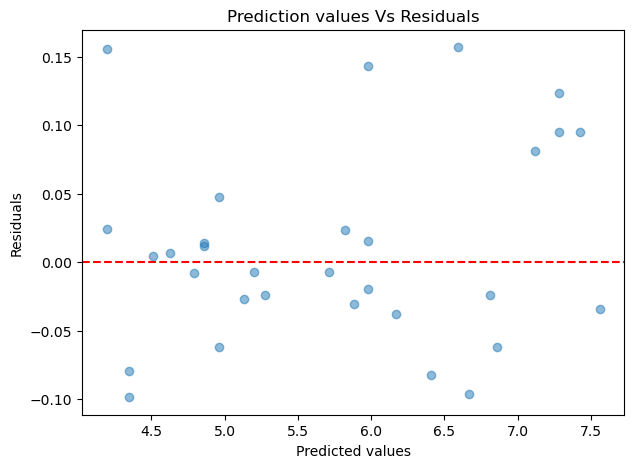

In [24]:
#Visualizing the Residual structure with reference to the Predicted values 

residuals = y_para_test - y_pred_test

plt.figure(figsize=(7,5))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Prediction values Vs Residuals')
plt.show()

In [26]:
#Cross-validation technique to evaluate model performance on 5 fold testing (4 split for training and 1 for testing)

c_model = LinearRegression()
scores = cross_val_score(c_model, x_para, y_para, cv=5)

print('Cross validation scores are: ', scores) #to print all 5 test fold scores
print('Mean score is: ', scores.mean()) #to print the mean value of all the cross validation technique evaluation

Cross validation scores are:  [0.9999994  0.9999985  0.99999847 0.99999455 0.99999931]
Mean score is:  0.9999980449665605


In [27]:
#CONCLUSION:

#The R2 value from training data and testing data is almost near to 1 which indicates the Good performance of the model I have applied.

#The lower MSE values of training & testing data can be considered as good performance of the model.

#The Residuals are mostly scattered around 0, which is ensuring the the best suitability of the Model for the given data.

#The mean score of values from Cross-validation evaluation is almost 1 which indicates the best performance of the model.